In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/Screenshot 2023-08-05 185213.png
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from PIL import Image
import warnings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
train=pd.read_csv('/kaggle/input/titanic/train.csv',index_col=0)
test=pd.read_csv('/kaggle/input/titanic/test.csv',index_col=0)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory data analysis

In [4]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### Both dataset has missing values. So,we fill these with an analytical approach

In [8]:
train.groupby('Sex').Age.mean()
genders=train.Sex.unique()
i=0
for gender in genders:
    train[train.Sex==gender]=train[train.Sex==gender].fillna({'Age':np.round(train.groupby('Sex').Age.mean()[i])})
    test[test.Sex==gender]=test[test.Sex==gender].fillna({'Age':np.round(test.groupby('Sex').Age.mean()[i])})
train.Embarked=SimpleImputer(strategy='most_frequent').fit_transform(train[['Embarked']])
test.Embarked=SimpleImputer(strategy='most_frequent').fit_transform(test[['Embarked']])
fare_test=np.round(test[(test.Pclass==3)&(test.Sex=='male')&(test.SibSp==0)&(test.Parch==0)&(test.Embarked=='S')].Fare.mean(),5)
test.fillna({'Fare':fare_test},inplace=True)
train=train.drop('Cabin',axis=1)
test=test.drop('Cabin',axis=1)

#### We use correlation to find the relationship between the data

In [9]:
conf=train.corr().abs()
conf.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_23/858917719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  conf=train.corr().abs()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,0.338481,0.064910,0.035322,0.081629,0.257307
Pclass,0.338481,1.000000,0.339898,0.083081,0.018443,0.549500
Age,0.064910,0.339898,1.000000,0.233296,0.172482,0.096688
SibSp,0.035322,0.083081,0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.172482,0.414838,1.000000,0.216225
Fare,0.257307,0.549500,0.096688,0.159651,0.216225,1.000000


#### Visualizing data in charts, graphs, and plots makes complex datasets easier to understand and interpret. Visual representations can provide valuable insights into patterns, trends, and relationships within the data that might be difficult to spot in raw numbers.So let's visualize graphs!

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


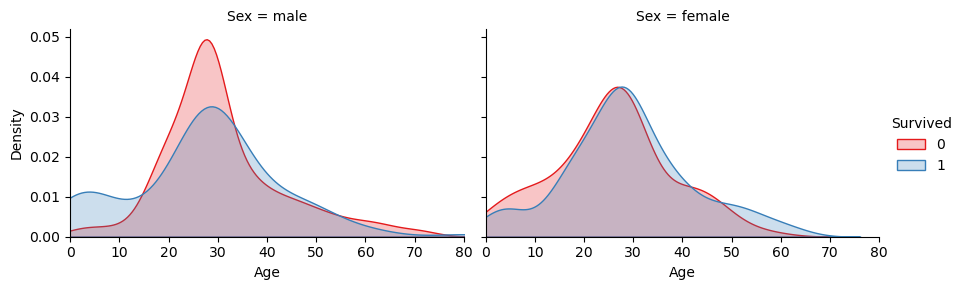

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


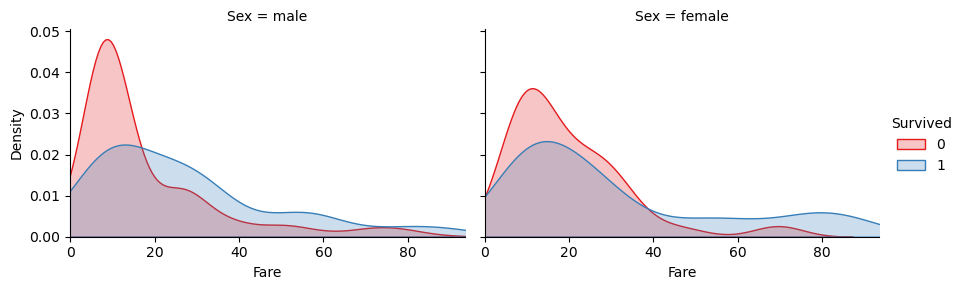

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


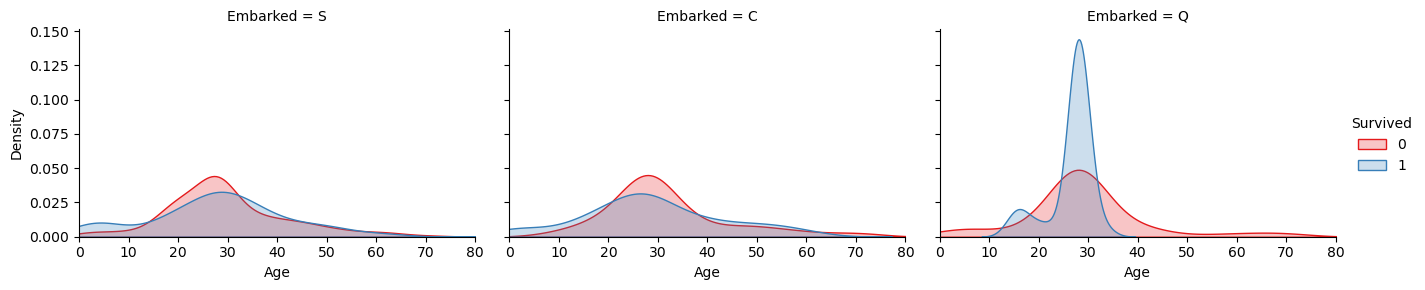

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


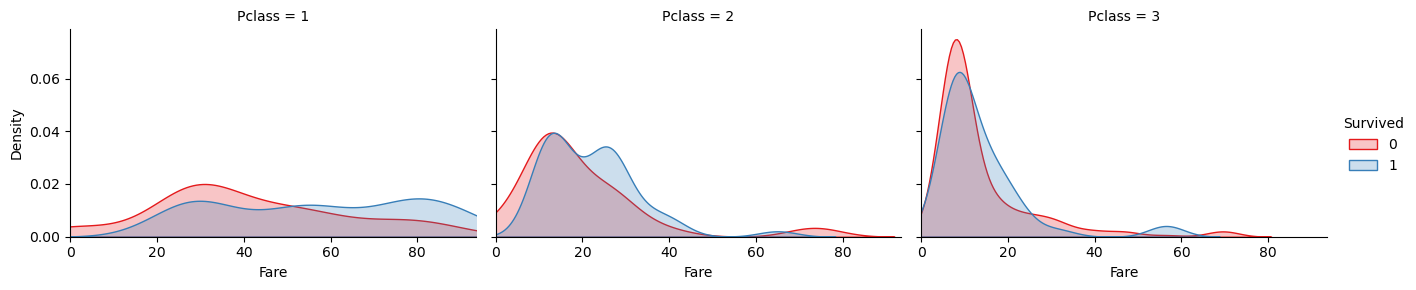

In [10]:
def make_facetGrid(data,column,x_value,plot_type):
    if column and x_value in data.columns:
        facet=sns.FacetGrid(data=data,col=column,hue='Survived',aspect=1.5,palette='Set1')
        facet.map(plot_type,x_value,fill=True)
        facet.set(xlim=(0,data[x_value].max()))
        facet.add_legend()
        plt.show()
make_facetGrid(train,'Sex','Age',sns.kdeplot) 
make_facetGrid(train[train.Fare<100],'Sex','Fare',sns.kdeplot)
make_facetGrid(train,'Embarked','Age',sns.kdeplot) 
make_facetGrid(train[train.Fare<100],'Pclass','Fare',sns.kdeplot) 
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")


### Interpretation:
* #### Many men have not surviveved
* #### So many passangers have survived embarked from Queenstown (C=Cherbourg,Q=Queenstown,S=Southampton)
* #### Most of the upper class members are in their 20s

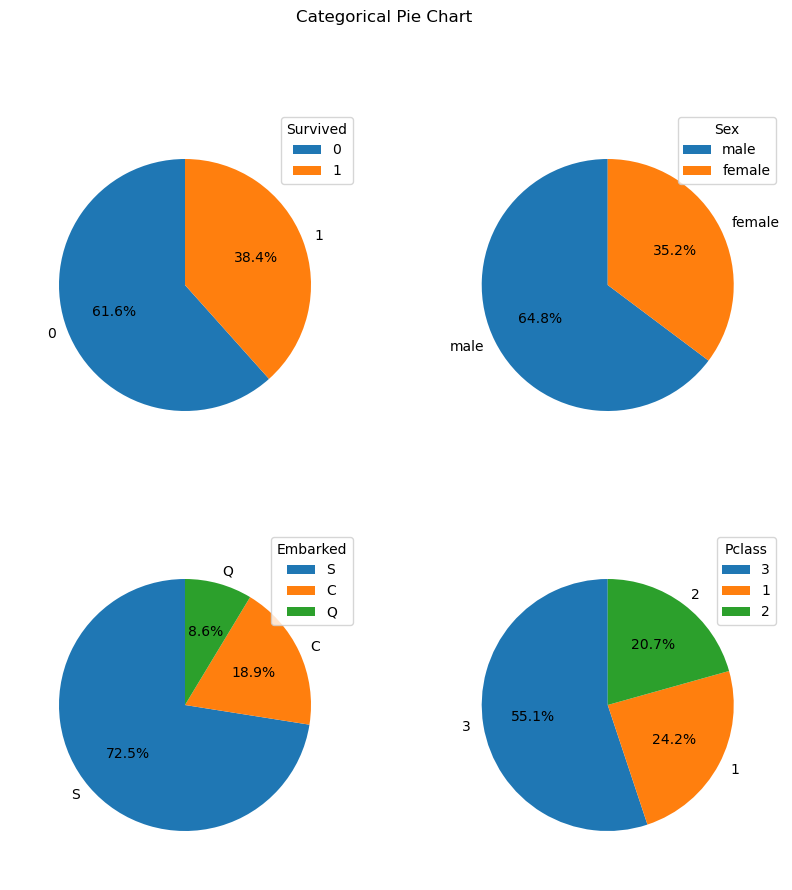

In [11]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Categorical Pie Chart')
axes=[ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
cols=['Survived','Sex','Embarked','Pclass']
for ax in axes:
    col_name=cols[axes.index(ax)]
    ax.pie(data=train,x=train[col_name].value_counts(),
        labels=train[col_name].unique(),startangle=90,
        shadow=False,radius=0.9,autopct='%1.1f%%')
    ax.legend(train[col_name].unique(),
              title=col_name,
              loc='best')
plt.show()

#### There we can see correlations in graphs

In [12]:
train.corrwith(train.Survived,numeric_only=True).abs().sort_values(ascending=False)

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.064910
SibSp       0.035322
dtype: float64

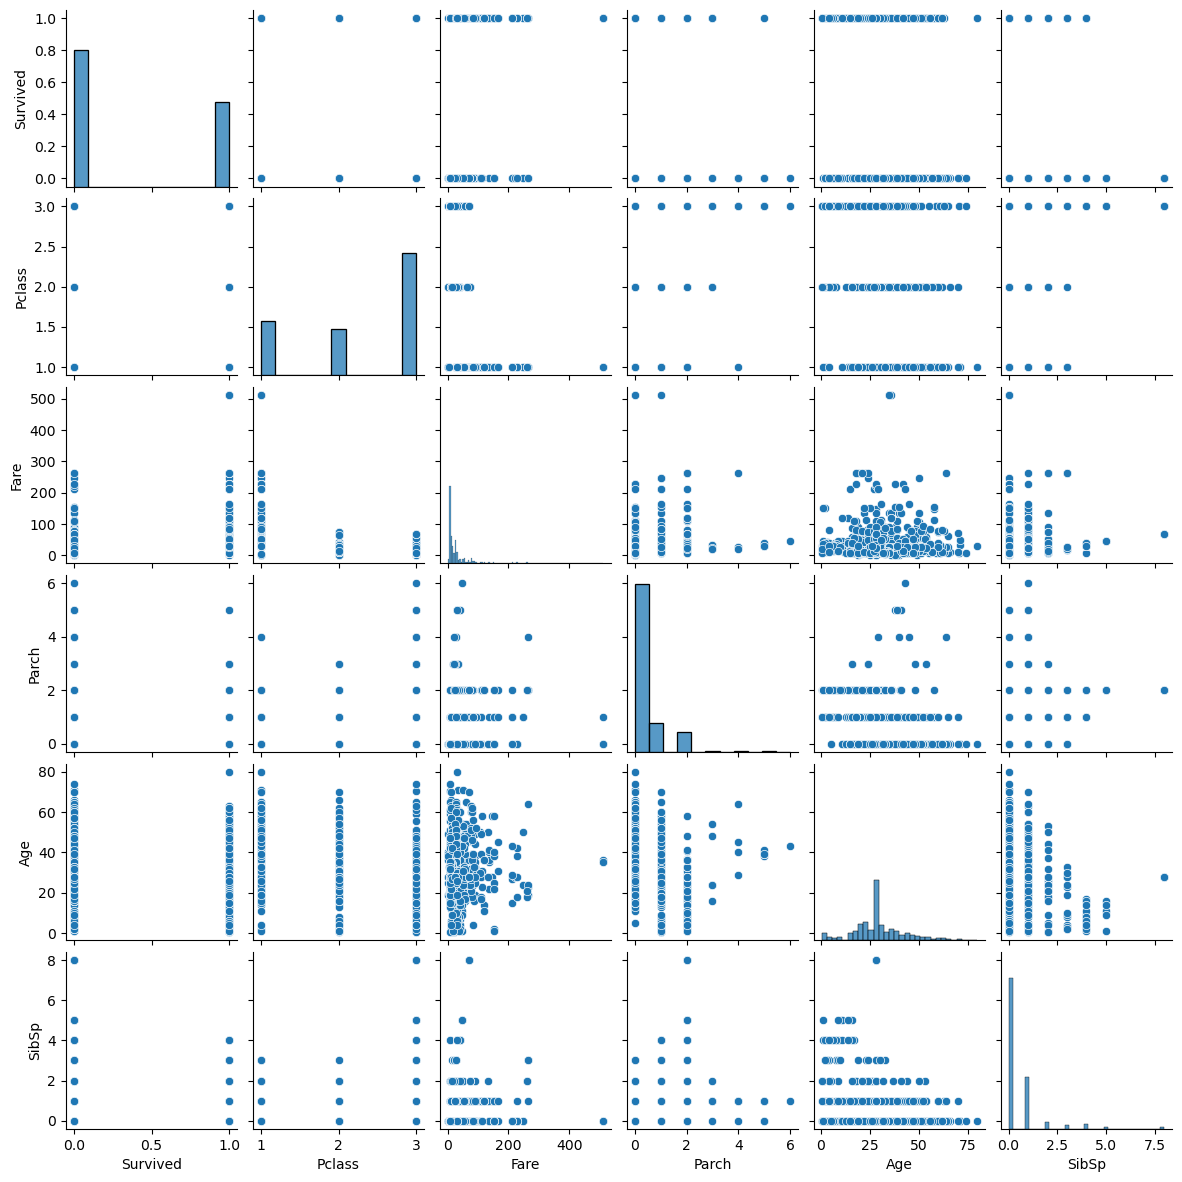

In [13]:
cols=['Survived','Pclass','Fare','Parch','Age','SibSp']
sns.pairplot(train[cols],height=2)
plt.show()

In [14]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Good feature engineering can significantly enhance the performance of machine learning models. By creating relevant and informative features, the model can better capture the underlying patterns and make more accurate predictions 
(By ChatGpt)

#### Now We use actual data to add changing or extra data by feature engineering

In [15]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
def substring_find(main_string,substrings):
    for substring in substrings:
        if main_string.find(substring)!=-1:
            return substring
        #print(main_string)
    return np.nan
def people_num(people):
    if people==0: return 1
    else: return 0
def feature_adding(data):    
    data['Individuals']=data['Name'].map(lambda x: substring_find(x,title_list))
    data['people_size']=data['Parch'].map(lambda x: people_num(x))
    data['people_size']+=data['Parch']+data['SibSp']+1
    data['fare_per_person']=data['Fare']/data['people_size']   
    data['Age*Class']=data['Age']/data['Pclass']
    data['Age*Fare']=data['Fare']/data['Age']
    return data
train=feature_adding(train)
test=feature_adding(test)

#### Correlated data increases when compared to previous data

In [16]:
conf=train.corr(numeric_only=True).abs()
conf.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare,people_size,fare_per_person,Age*Class,Age*Fare
Survived,1.000000,0.338481,0.064910,0.035322,0.081629,0.257307,0.027112,0.249772,0.164674,0.136219
Pclass,0.338481,1.000000,0.339898,0.083081,0.018443,0.549500,0.088894,0.527114,0.790843,0.142529
Age,0.064910,0.339898,1.000000,0.233296,0.172482,0.096688,0.216608,0.136262,0.760919,0.301814
SibSp,0.035322,0.083081,0.233296,1.000000,0.414838,0.159651,0.932227,0.040665,0.130744,0.192251
Parch,0.081629,0.018443,0.172482,0.414838,1.000000,0.216225,0.678852,0.049596,0.100037,0.254118
Fare,0.257307,0.549500,0.096688,0.159651,0.216225,1.000000,0.187141,0.933598,0.407932,0.308026
people_size,0.027112,0.088894,0.216608,0.932227,0.678852,0.187141,1.000000,0.036625,0.137620,0.217946
fare_per_person,0.249772,0.527114,0.136262,0.040665,0.049596,0.933598,0.036625,1.000000,0.417087,0.219674
Age*Class,0.164674,0.790843,0.760919,0.130744,0.100037,0.407932,0.137620,0.417087,1.000000,0.094151
Age*Fare,0.136219,0.142529,0.301814,0.192251,0.254118,0.308026,0.217946,0.219674,0.094151,1.000000


# Data Preprocessing
#### For ML, we preproccess data

In [17]:
train_X=train.drop(['Name','Ticket','Survived'],axis=1)
train_y=train['Survived']
test_X=test.drop(['Name','Ticket'],axis=1)

In [18]:
pipe_num=Pipeline([('normalize',StandardScaler())])
train_X['Individuals']=OrdinalEncoder().fit_transform(train_X[['Individuals']])
test_X['Individuals']=OrdinalEncoder().fit_transform(test_X[['Individuals']])
cat_cols=['Sex','Embarked']
num_cols=['Pclass','Age','SibSp','Parch','Fare','Individuals',
          'people_size','fare_per_person','Age*Class','Age*Fare']
pipe_full=ColumnTransformer([
        ('cat_onehot',OneHotEncoder(),cat_cols),
        ('numberic',pipe_num,num_cols)
])
train_prep=pipe_full.fit_transform(train_X)
test_prep=pipe_full.fit_transform(test_X)

#### I decided to train and make prediction using some classification algorithms.Firstly, I predict the train by dividing it into parts and without dividing.For both results, I plot bar graphs

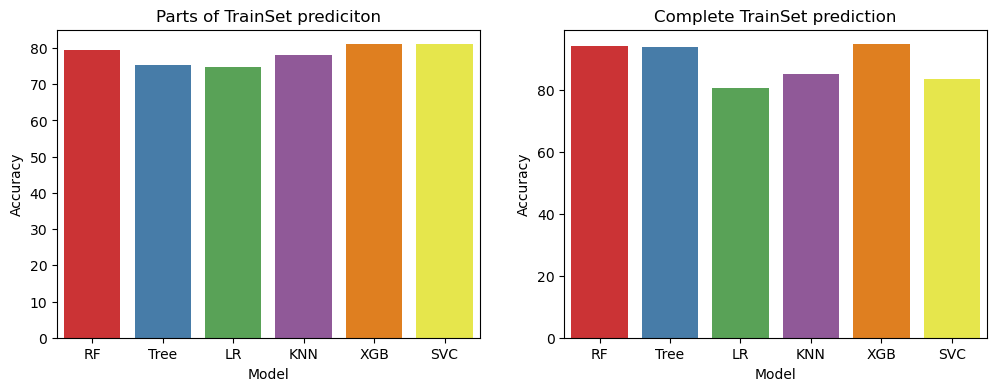

In [19]:
model_RF=RandomForestClassifier(n_estimators=100,n_jobs=4)
model_Tree=DecisionTreeClassifier(random_state=23)
model_LR=LogisticRegression()
model_KNN=KNeighborsClassifier(n_neighbors=3)
model_XGB=XGBClassifier()
model_SVC=SVC(random_state=23)

def model_evol(model):
    train_X1,test_X1,train_y1,test_y1=train_test_split(train_prep,train_y.values,
                                                        test_size=0.2,random_state=23)
    model.fit(train_X1,train_y1)
    predict=model.predict(test_X1)
    predict_all=model.predict(train_prep)
    accuracy=accuracy_score(test_y1,predict)*100
    accuracy_full=accuracy_score(train_y,predict_all)*100
    return accuracy,accuracy_full
scores=[model_evol(model_RF)[0],model_evol(model_Tree)[0],model_evol(model_LR)[0],
        model_evol(model_KNN)[0],model_evol(model_XGB)[0],model_evol(model_SVC)[0]]
scores_all=[model_evol(model_RF)[1],model_evol(model_Tree)[1],model_evol(model_LR)[1],
        model_evol(model_KNN)[1],model_evol(model_XGB)[1],model_evol(model_SVC)[1]]
models=['RF','Tree','LR','KNN','XGB','SVC']
data=pd.DataFrame(np.array([models,scores]).T,columns=['Model','Accuracy'])
data_all=pd.DataFrame(np.array([models,scores_all]).T,columns=['Model','Accuracy'])
data.Accuracy=data.Accuracy.astype(dtype=float)
data_all.Accuracy=data_all.Accuracy.astype(dtype=float)
fig,ax=plt.subplots(1,2,figsize=(12,4))

sns.barplot(data=data,x='Model',y='Accuracy',palette='Set1',ax=ax[0])
ax[0].set_title('Parts of TrainSet prediciton')
sns.barplot(data=data_all,x='Model',y='Accuracy',palette='Set1',ax=ax[1])
ax[1].set_title('Complete TrainSet prediction')
plt.show()

#### Acutally,I have seen that the random forest algorithm works with good accuracy in many cases.So, I choose this algorithms,although, it works almost the same as other algorithms like XGB and Decision Tree

#### Now, We use  K-fold Cross-Validation to take more accurate result

In [20]:
kfold=KFold(n_splits=5,shuffle=True,random_state=23)
accuracy=[]
predictions=[]
train_y_val=train_y.values
for train_ix,test_ix in kfold.split(train_prep):
    X_train,y_train=train_prep[train_ix],train_y_val[train_ix]
    X_test,y_test=train_prep[test_ix],train_y_val[test_ix]
    RF_model=RandomForestClassifier(random_state=23)
    RF_model.fit(X_train,y_train)
    predict_train=RF_model.predict(X_test)
    predict=RF_model.predict(test_prep)
    accuracy.append(accuracy_score(predict_train,y_test))
    predictions.append(predict)
predict_kf=predictions[accuracy.index(max(accuracy))]

In [21]:
print(f"Accuracy: {accuracy}")

Accuracy: [0.7932960893854749, 0.8539325842696629, 0.7865168539325843, 0.8146067415730337, 0.8146067415730337]


In [22]:

RF=RandomForestClassifier()
scoring=cross_val_score(RF,train_prep,train_y,scoring='accuracy',cv=5)
print(scoring)

[0.81005587 0.81460674 0.86516854 0.79775281 0.8258427 ]


predict[-5:]

In [23]:
train_prep.shape

(891, 15)

#### Sometimes Deep Learning help us to take better result and accuracy.Therefore,I use tensorflow to make prediction with deep learning neural network

In [24]:
model=keras.models.Sequential()
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
model.fit(train_prep,train_y,epochs=25)

Epoch 1/25
28/28 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.6139
Epoch 2/25
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162
Epoch 3/25
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162
Epoch 4/25
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162
Epoch 5/25
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162
Epoch 6/25
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162
Epoch 7/25
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162
Epoch 8/25
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162
Epoch 9/25
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162
Epoch 10/25
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162
Epoch 11/25
28/28 [==============================

### These results are obtained from submission to kaggle competitor. The highest accuracy belongs to the model using random forest in kfold.

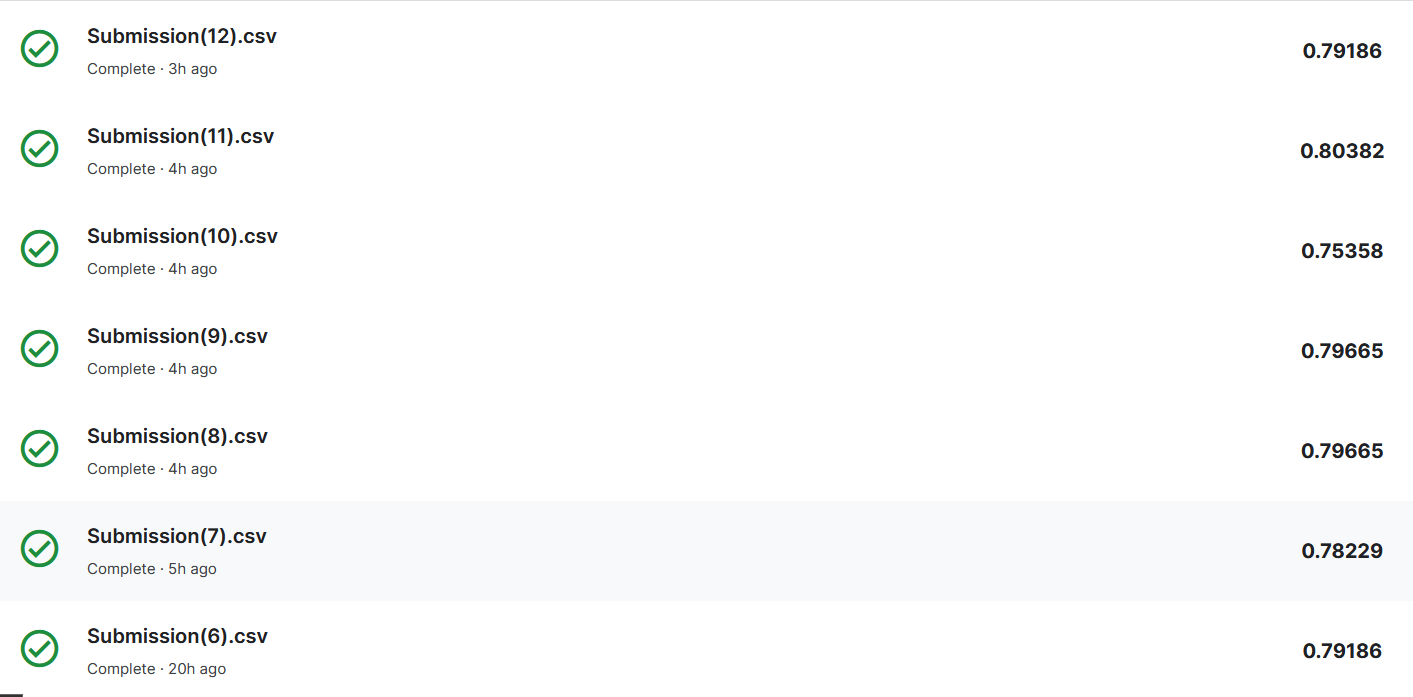

In [25]:
Image.open('/kaggle/input/images/Screenshot 2023-08-05 185213.png')

In [26]:
result=pd.DataFrame(predict_kf,index=test.index,columns=['Survived'])
result.to_csv('Submission.csv')
result

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0
